# Линейная алгебра: сходство текстов и аппроксимация функций

### Вы научитесь:
  * читать тексты из файла с помощью Python и разбивать их на слова
  * переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
  * решать системы линейных уравнений
  * приближать любые функции с помощью многочленов
  
## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

## Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

  * кошки (животные)
  * UNIX-утилита cat для вывода содержимого файлов
  * версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

#### Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n x d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
7. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова.

In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import re

In [65]:
# ваш код
df = pd.read_table("sentences.txt", sep = '  ',  header = None, names = ["strings"]) # считываем в DataFrame данные из sentences.txt

df = df.apply(lambda x: x.str.lower()) # Приводим все слова в файле к нижнему регистру

for i in range(df.shape[0]): 
    df["strings"][i] = re.split('[^a-z]', df["strings"][i]) # Разделяем предложения на списки из слов
    df["strings"][i] = [word for word in df["strings"][i] if word != " " and word != ""] # Убираем пустые ячейки

words = set() # множество всех слов
for i in range(df.shape[0]):
    words = words | set(df["strings"][i]) # Находим уникальные слова 

matrix = pd.DataFrame(np.zeros([22, 254]), columns = list(words)) # Создаем матрицу слов и их вхождений в предложения

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        matrix.iloc[i, j] = df["strings"][i].count(matrix.columns[j]) # Заполняем матрицу


cosin = {} # Создаем словарь с косинусными расстояниями
for i in range(1, matrix.shape[0]):
    cosin[i] = spatial.distance.cosine(matrix.loc[0, :], matrix.loc[i, :]) # рассчитываем расстояние между 1 предложением и остальными

cosin = sorted(cosin.items(), key = lambda x: x[1]) # сортируем по увеличению расстояния

print(cosin) # Итак, 2 ближайших предложения по косинусному расстоянию к 1, это 6 и 4

[(6, 0.7327387580875756), (4, 0.7770887149698589), (21, 0.8250364469440588), (10, 0.8328165362273942), (12, 0.8396432548525454), (16, 0.8406361854220809), (20, 0.8427572744917122), (2, 0.8644738145642124), (13, 0.8703592552895671), (14, 0.8740118423302576), (11, 0.8804771390665607), (8, 0.8842724875284311), (19, 0.8885443574849294), (3, 0.8951715163278082), (9, 0.9055088817476932), (7, 0.9258750683338899), (5, 0.9402385695332803), (15, 0.9442721787424647), (18, 0.9442721787424647), (1, 0.9527544408738466), (17, 0.956644501523794)]


C:\Users\Petr\AppData\Local\Temp\ipykernel_6884\3190650514.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table("sentences.txt", sep = '  ',  header = None, names = ["strings"]) # считываем в DataFrame данные из sentences.txt
C:\Users\Petr\AppData\Local\Temp\ipykernel_6884\3190650514.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][

## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию?

In [122]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    x = np.array(x)
    return np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)

In [123]:
x = np.arange(1, 16, 0.1)
y = f(x)

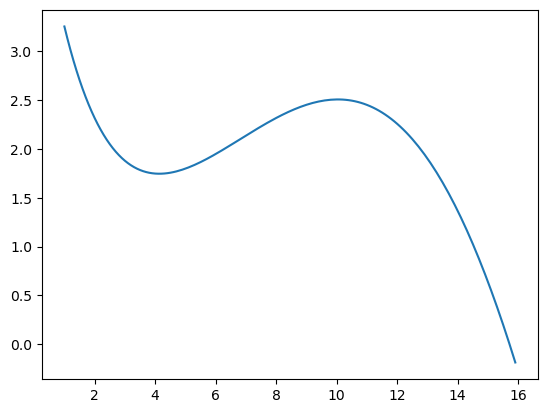

In [134]:
plt.plot(x, y)
plt.show()

In [135]:
"""
    Создание матриц иксов для многочленов 1, 2 и 3 степеней
"""

x2 = np.stack(([1, 15], [1, 1]), axis=1)
x3 = np.stack((np.array([1, 8, 15])**2, [1, 8, 15], [1, 1, 1]), axis=1)
x4 = np.stack((np.array([1, 4, 10, 15])**3, np.array([1, 4, 10, 15])**2, [1, 4, 10, 15], [1, 1, 1, 1]), axis=1)

In [136]:
"""
    Нахождение коэффициентов для многочленов
"""

import scipy

w2 = scipy.linalg.solve(x2, f([1, 15]))
w3 = scipy.linalg.solve(x3, f([1, 8, 15]))
w4 = scipy.linalg.solve(x4, f([1, 4, 10, 15]))

In [137]:
"""
    Получение соответствующей функции
"""
y_approx_2 = x2 @ w2
y_approx_3 = x3 @ w3
y_approx_4 = x4 @ w4

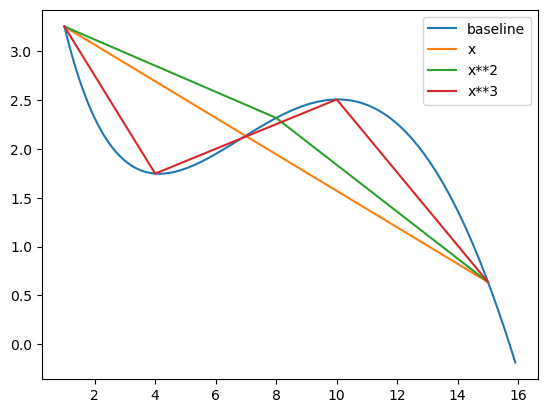

In [142]:
plt.plot(x, y)
plt.plot([1, 15], y_approx_2)
plt.plot([1, 8, 15], y_approx_3)
plt.plot([1, 4, 10, 15], y_approx_4)
plt.legend(["baseline","x", "x**2", "x**3"])
plt.show()